# Different question types

In [1]:
%cd ..

C:\Users\Stefan.Beuchert\Desktop\backup_from_kubectl


In [2]:
# config
number_of_features = 10 # the default value
number_of_samples = 5000 # the default value

source_path_for_data = f'data/Data_Preparation/lime_ns_{number_of_samples}_nf_{number_of_features}_after_frequency_analysis.json'

In [3]:
from src.analyzer import sort_tokens_in_categories, get_frequencie, display_frequencies
from src.ExplanationObjectForQuestionType import ExplanationObjectForQuestionType

import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stefan.Beuchert\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefan.Beuchert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# load data
data_df = pd.read_json(source_path_for_data)
data_df['explanation'] = [pd.DataFrame(exp) for exp in data_df['explanation'].tolist()]
data_df.head()

,question,answers,context,document_id,is_impossible,usage,prediction,explanation
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...
36553,Wer wanderte nach North Carolina Anfang des 20...,"[{'answer_id': 36895, 'document_id': 40789, 'q...",North_Carolina\n\n==== Europäische Amerikaner ...,40789,False,test,eine Gruppe orthodoxer Einwanderer aus der Ukr...,position_id lime_token question_or_contex...
36597,Was gehört zum Stadtkirchenverband Hannover?,"[{'answer_id': 36938, 'document_id': 40797, 'q...",Hannover\n\n==== Evangelisch-lutherische Kirch...,40797,False,test,Alle landeskirchlichen evangelischen Kirchenge...,position_id lime_token question...
37392,Wann starb Athanasius der Große?,"[{'answer_id': 37749, 'document_id': 41075, 'q...","Athanasius_der_Große\nGriechische Ikone, Titul...",41075,False,test,2. Mai 373,position_id lime_token question_or_con...
37351,Welche Länder liegen östlich des Irans?,"[{'answer_id': 37706, 'document_id': 41082, 'q...",Iran\n\n=== Antike und Mittelalter ===\nDas he...,41082,False,test,Indien und China,position_id lime_token question_or_conte...


## Prepare Data

In [5]:
# split into question types
def identify_question_type(question):
    question = question.lower()
    if question[-1] == '?': question = question[:-1] # remove '?' from question (if there is one)
    
    question_type = None
    
    # check for 'wie viel' as the only w-question that contains two 2 tokens
    if 'wie viel' in question:
        question_type = 'wie viel'
    
    # if 'wie viel' is identified, no need to check for other question words
    else:
        # split question into tokens
        question_tokens = question.split(' ')
        
        # turns out that all questions have the question word at the beginning of the question.
        # therefore we only have to look at the first token
        # question_tokens = [question_tokens[0]]

        question_words_list = [
            # https://de.wikipedia.org/wiki/W-Wort
            'wer', 'welche', 'welcher',
            'wem', 'wen', 'welchen', 'welchem',
            'wessen',
            'was', 'welches',
            'warum', 'weshalb', 'weswegen', 'wieso',
            'wie', 'wieweit', #'wie viel'
            'wofür', 'wozu', 'womit', 'wodurch', 'worum', 'worüber', 'wobei', 'wovon', 'woraus',
            'wo', 'wogegen',
            'wohin', 'woher',
            'woran', 'worin', 'worauf', 'worunter', 'wovor', 'wohinter', 'woneben',
            'wann',
            # below words that have been added by looking at the questions that are not covered by the word above
            'wonach', 'inwiefern' 
        ]

        # check for other w-quetions
        for question_word in question_words_list:
            if question_word in question_tokens:
                if (question_type is not None):
                    #print(f'{question} - has multiple question types')
                    question_type = 'conflict'
                else:
                    question_type = question_word
    
    if question_type is None:
        print(f'{question} - has no question type')
        question_type = 'undefined'
        
    if question_type is None:
        print(i)
    return question_type

In [6]:
question_list = data_df['question'].tolist()
question_type_list = [identify_question_type(q) for q in question_list]
data_df['question_type'] = question_type_list

gibt es immer noch kohlenfadenlampen - has no question type
zum wievielten mal hintereinander stand der fc everton 1986 im fa cup finale - has no question type
ist usb mit atari mint benutzbar - has no question type
war die glorious revolution gewaltsam - has no question type
in wiefern erweiterte rudolf clausius das verständnis von energie und wärme - has no question type
haben wir im moment eine warm- oder kaltzeit - has no question type
war die republik der vereinigten niederlande ein zentralstaat - has no question type
ist frankreich offensiv, oder defensiv an den deutsch-französischen-krieg herangegangen - has no question type
sind usb 3.0.stecker mit älteren typen kompatibel - has no question type
müssen hunde gegen tollwut geimpft werden - has no question type
ist in englischen pubs das rauchen erlaubt - has no question type
ist kupfer gesundheitsschädlich - has no question type
liegt bildung im aufgabenbereich der verwaltungsbezirke von melbourne oder beim bundesstaat - has no 

In [7]:
data_df.head()

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...,wie viel
36553,Wer wanderte nach North Carolina Anfang des 20...,"[{'answer_id': 36895, 'document_id': 40789, 'q...",North_Carolina\n\n==== Europäische Amerikaner ...,40789,False,test,eine Gruppe orthodoxer Einwanderer aus der Ukr...,position_id lime_token question_or_contex...,wer
36597,Was gehört zum Stadtkirchenverband Hannover?,"[{'answer_id': 36938, 'document_id': 40797, 'q...",Hannover\n\n==== Evangelisch-lutherische Kirch...,40797,False,test,Alle landeskirchlichen evangelischen Kirchenge...,position_id lime_token question...,was
37392,Wann starb Athanasius der Große?,"[{'answer_id': 37749, 'document_id': 41075, 'q...","Athanasius_der_Große\nGriechische Ikone, Titul...",41075,False,test,2. Mai 373,position_id lime_token question_or_con...,wann
37351,Welche Länder liegen östlich des Irans?,"[{'answer_id': 37706, 'document_id': 41082, 'q...",Iran\n\n=== Antike und Mittelalter ===\nDas he...,41082,False,test,Indien und China,position_id lime_token question_or_conte...,welche


## Visualize W-Word distribution

   question_type  count
5            was    441
17           wie    249
3           wann    247
6         welche    243
13           wer    188
18      wie viel    154
9        welcher    106
20            wo    102
7        welchem     75
4          warum     73
10       welches     62
8        welchen     57
19         wieso     31
2      undefined     25
22         wofür     19
11           wem     18
0       conflict     16
33          wozu     10
23         woher      9
21       wodurch      8
12           wen      7
24         wohin      6
32         wovon      5
27         woran      4
1      inwiefern      4
15        wessen      4
16      weswegen      2
26        wonach      2
14       weshalb      2
28        woraus      2
30         worum      2
29         worin      1
31       worüber      1
25         womit      1


<AxesSubplot:xlabel='question_type'>

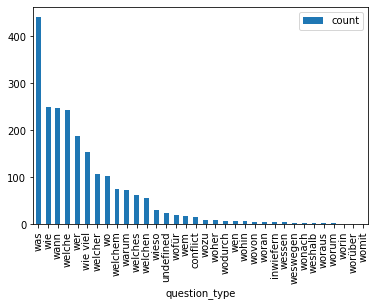

In [8]:
df_for_bar_chart = data_df.groupby(['question_type'])['question_type'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(df_for_bar_chart)
df_for_bar_chart.plot(kind = 'bar', x = 'question_type')

### Deep dive 'was'

In [9]:
question_type = 'was'

In [10]:
questions = data_df[data_df['question_type'] == question_type]
questions.head(3)

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
36597,Was gehört zum Stadtkirchenverband Hannover?,"[{'answer_id': 36938, 'document_id': 40797, 'q...",Hannover\n\n==== Evangelisch-lutherische Kirch...,40797,False,test,Alle landeskirchlichen evangelischen Kirchenge...,position_id lime_token question...,was
41609,Was war die kälteste gemessene Temperatur in O...,"[{'answer_id': 43235, 'document_id': 40954, 'q...",Oklahoma_City\n\n=== Klima ===\nDie Stadt befi...,40954,False,test,−27 °C,position_id lime_token question_or_cont...,was
36702,Was sind Pixel?,"[{'answer_id': 37050, 'document_id': 40671, 'q...",High_Definition_Television\n\n==== Nomenklatur...,40671,False,test,,position_id lime_token q...,was


In [17]:
explanation = ExplanationObjectForQuestionType('alle', data_df)

out of 2176 data points, 119 have been deleted, because GELECTRA could not finde a sufficent answer. 2057 data point remaining


In [18]:
print(explanation)


        === ALLE ===
        Die Antwortlänge beträgt in 75% der Fälle zwischen 2.0 und 22.0 Worten.
        


C:\Users\Stefan.Beuchert\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


No data for end_tokens_negative_df word weight
No data for end_tokens_negative_df word count


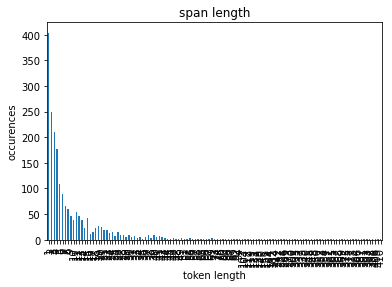

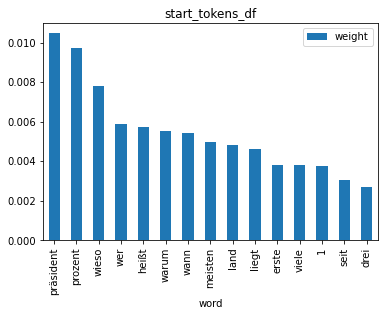

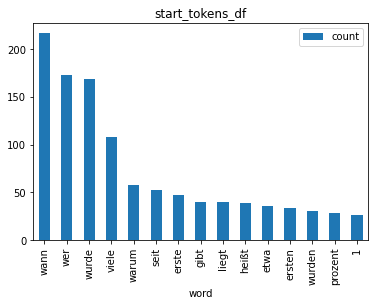

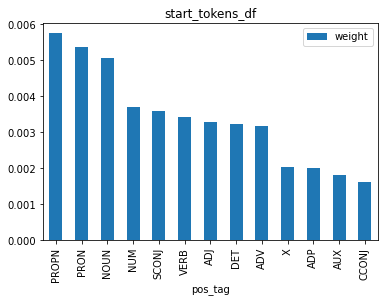

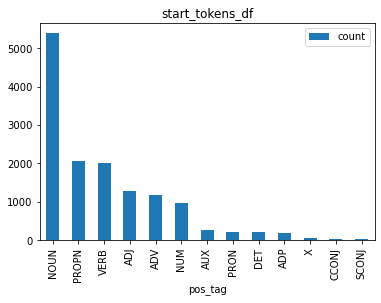

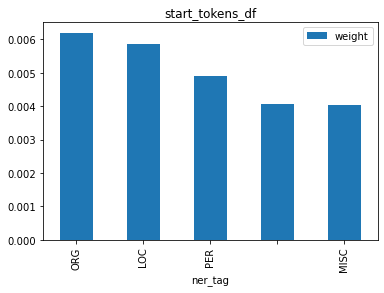

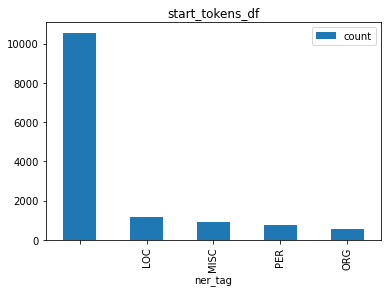

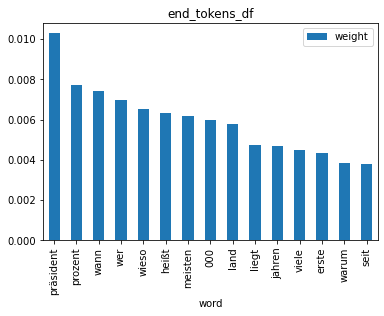

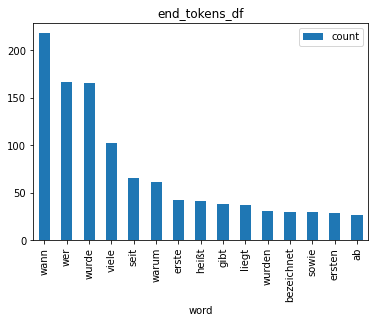

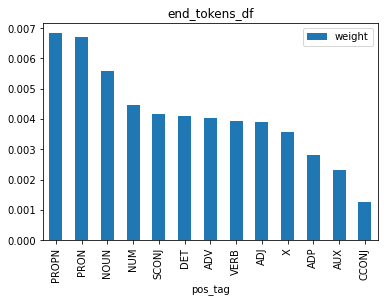

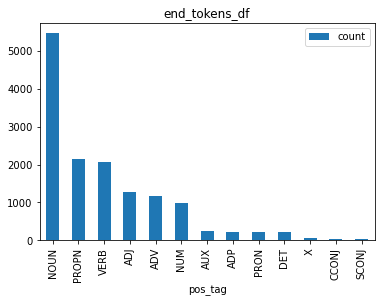

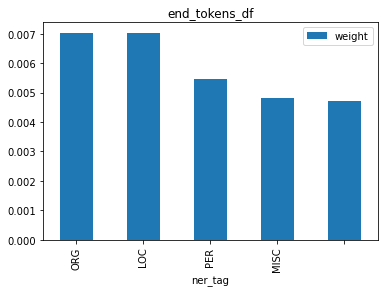

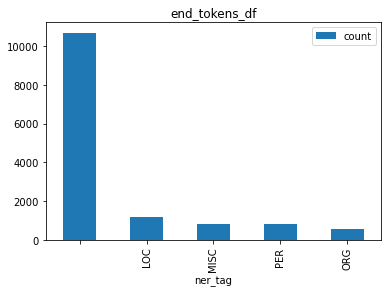

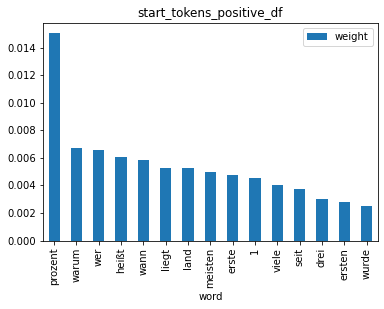

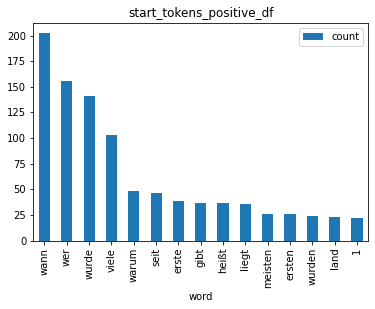

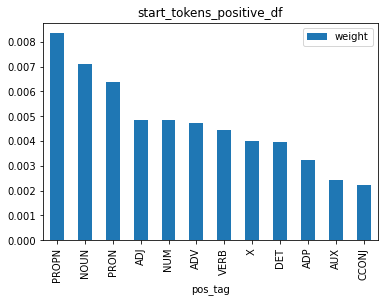

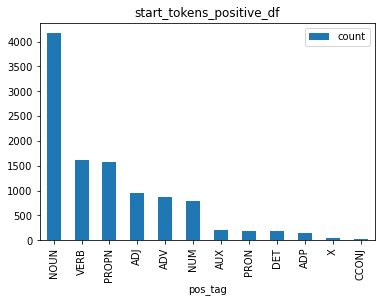

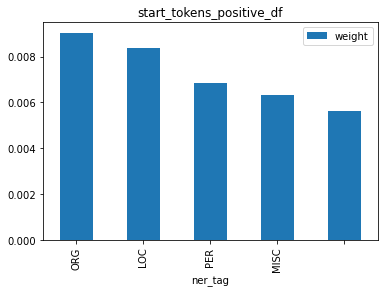

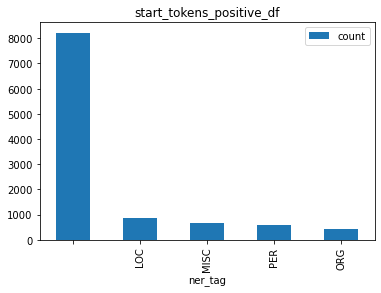

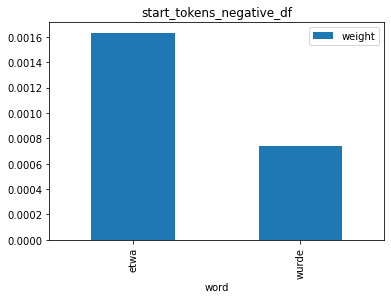

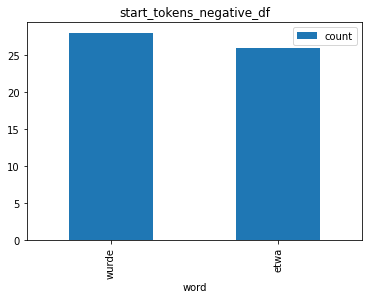

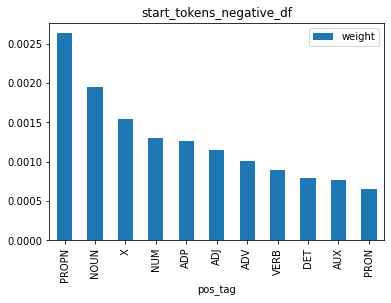

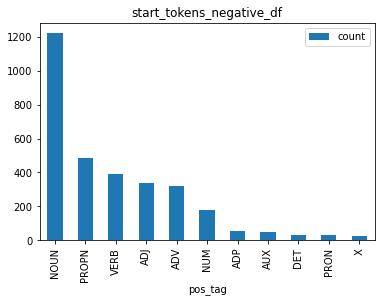

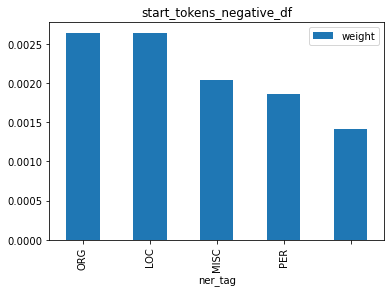

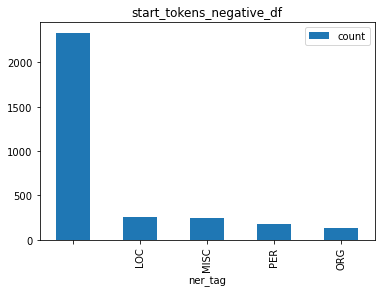

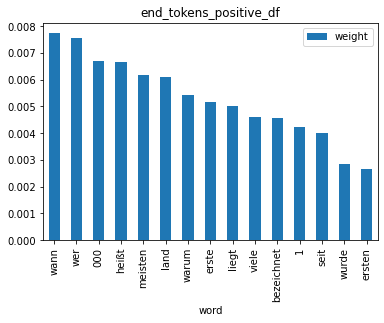

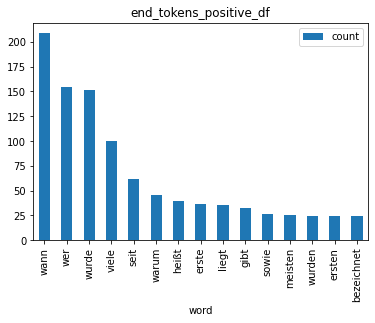

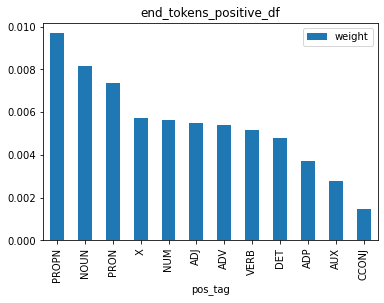

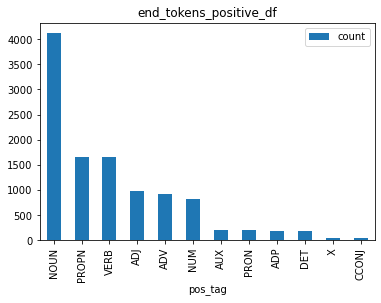

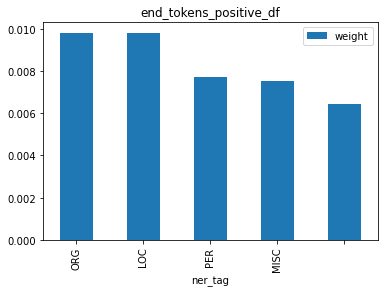

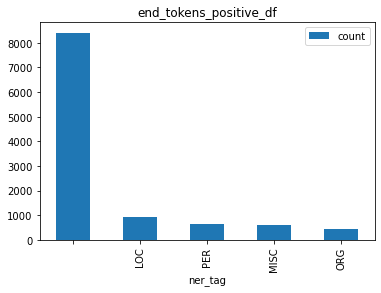

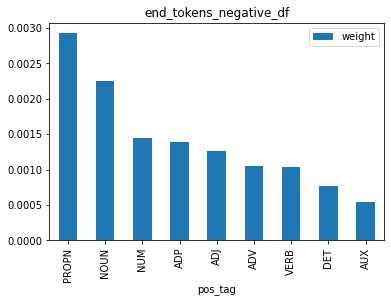

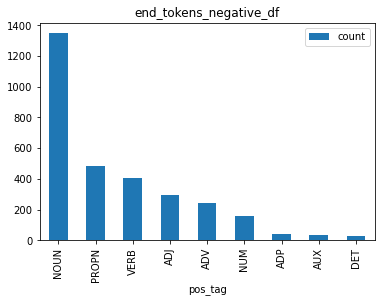

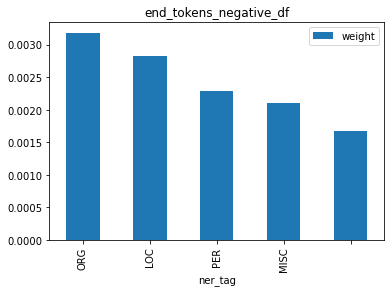

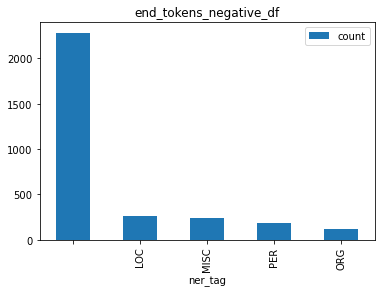

In [19]:
explanation.visualize()

In [14]:
#### analyzing start and end tokens

In [15]:
explanation.data_df['prediction_start_token'] = 

SyntaxError: invalid syntax (1897531615.py, line 1)

In [ ]:
string = 'ich bin toll'
tokens = my_str.split()


In [ ]:
question_tokens_with_weights_dict = sort_tokens_in_categories(questions['explanation'].tolist())

In [ ]:
# Exploring the properties of LIME explanations in context of the "what" questions

# answer lengths

In [ ]:
questions['prediction_length'] = [len(answer.split()) for answer in questions['prediction'].tolist()]
questions.groupby(['prediction_length']).size().plot(kind = "bar", xlabel = 'token length', ylabel = 'occurences')

In [ ]:
a = questions['prediction_length'].describe()

In [ ]:
q_low = questions["prediction_length"].quantile(0.01)
q_hi  = questions["prediction_length"].quantile(0.99)

df_filtered = questions[(questions["prediction_length"] < q_hi) & (questions["prediction_length"] > q_low)]

In [ ]:
df_filtered.groupby(['prediction_length']).size().plot(kind = "bar", xlabel = 'token length', ylabel = 'occurences')

In [ ]:
df_filtered.describe()

In [ ]:
# start tokens with percentile, no stopwords and weigthed average
start_tokens_tfidf_df = get_frequencie(question_tokens_with_weights_dict['start_tokens_df'], 
                                       max_tokens = 15, mode = 'weight', target = 'word', 
                                       remove_stop_words = True, min_count = percentile_1)

start_tokens_tfidf_df.plot(x = 'word', y = 'weight', kind = 'bar')

In [ ]:
# start ner with percentile, no stopwords and weigthed average
start_ner_tfidf_df = get_frequencie(was_question_tokens_with_weights_dict['start_tokens_df'], 
                                       max_tokens = 15, mode = 'frq', target = 'ner_tag', 
                                       remove_stop_words = True, min_count = percentile_1)

start_ner_tfidf_df.plot(x = 'ner_tag', y = 'count', kind = 'bar')

In [ ]:
# start ner with percentile, no stopwords and weigthed average
start_ner_tfidf_df = get_frequencie(was_question_tokens_with_weights_dict['start_tokens_df'], 
                                       max_tokens = 15, mode = 'weight', target = 'ner_tag', 
                                       remove_stop_words = True, min_count = percentile_1)

start_ner_tfidf_df.plot(x = 'ner_tag', y = 'weight', kind = 'bar')